#### Balaji Kartheek  (200968080)

#### Meta Data of the mtcars :
mtcars: Motor Trend Car Road Tests

A data frame with 32 observations on 11 (numeric) variables.

mpg Miles/(US) gallon

cyl Number of cylinders

disp Displacement (cu.in.)

hp Gross horsepower

drat Rear axle ratio

wt Weight (1000 lbs)

qsec 1/4 mile time

vs Engine (0 = V-shaped, 1 = straight)

am Transmission (0 = automatic, 1 = manual)

gear Number of forward gears

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Excercise

## Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line


In [2]:
# the below function returns the coefficients of the linear model that we hypothesized
def myFnLinReg(x,y):
    x_mean = x.mean()
    y_mean = y.mean()
    
    numerator = ((x-x_mean)*(y-y_mean)).sum()
    denominator = ((x-x_mean)**2).sum()
    
    theta1 = numerator/denominator
    theta0 = y_mean - (theta1*x_mean)
    
    return(theta0,theta1)

### this function returs the coefficients of the straight line

## Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (70 %,30%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car. 



In [3]:
data = pd.read_csv(r"C:\Users\tbala\OneDrive\Desktop\Academics\DataSets\mtcars.csv")

In [4]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
X = data['wt']
Y = data['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 0)

#### why train_test_split is needed?
train_test_split is done on the dataset, 
 train dataset is used to train the model, 
 test dataset is used to test the model that model doesn't seen the data before so we get know that how well the model performs on the unseen data


### The Scatter Plot between mpg and weight of a car

Text(0, 0.5, 'mpg')

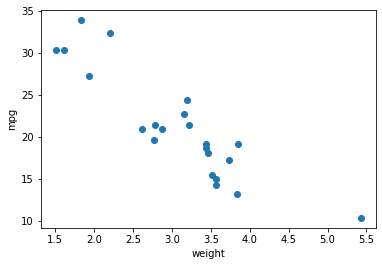

In [8]:
# matplotlib contains all types of plots
plt.scatter(X_train,Y_train)
plt.xlabel("weight")
plt.ylabel("mpg")

#### passing the parameters lr_theta0,lr_theta1 to myFnLinReg() to get the coefficients of the model

In [9]:
lr_theta0,lr_theta1 = myFnLinReg(X_train,Y_train)
lr_theta0,lr_theta1

(40.63710645591722, -6.321221582690658)

### The Regression Equation is: 
### mpg_car = 40.63710645591722+(-6.321221582690658*weight)

## What is the mpg of a car, whose weight is 6.7?

In [10]:
# returns the value of dependent attribute 
def mpg_car(weight):
    return(40.63710645591722+(-6.321221582690658*weight))

In [11]:
mpg_car(6.7)      # passing the weight 6.7


-1.7150781481101873

## Compute and print accuracy measures such as RMSE and R2 for the test set.

RMSE = root mean square error


In [12]:
Y_test       # actual mpg
y_predicted =  40.63710645591722+(-6.321221582690658*X_test)           # predicted mpg
error = Y_test - y_predicted         #error 
RMSE = np.sqrt(((error**2).sum())/len(Y_test))
    

In [13]:
RMSE

3.700531874067273

## RMSE(Root Mean Square Error) IS 3.700531874067273

In [15]:
Y_mean = Y_test.mean()

In [16]:
# Function to calculate the Correlation Co-efficient
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [17]:
R = corr_coef(X_test, Y_test)
R

-0.8689276480625525

### r= -0.869 represents they are highly negatively correlated

In [18]:
R**2

0.7550352575675191

## R2 value is 0.7550352575675191

### R^2 = 0.755 represents 75% of x values(weight of car) lie on the hypothesized model

## Gradient Descent Algorithms are used to minimize the mean squared error by calculating the best theta parameters

## Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.


## stochastic Gradient Descent

## since our columns are on different scale its important to perform the scaling on them

In [19]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()   # object for x 
sy = preprocessing.MinMaxScaler()

# df.shape[0] gives the no. of samples in the dataset
scaled_x = sx.fit_transform(data['wt'].values.reshape(data.shape[0],1))
scaled_y = sy.fit_transform(data['mpg'].values.reshape(data.shape[0],1))

In [20]:
scaled_x

array([[0.28304781],
       [0.34824853],
       [0.20634109],
       [0.43518282],
       [0.49271286],
       [0.49782664],
       [0.52595244],
       [0.42879059],
       [0.41856303],
       [0.49271286],
       [0.49271286],
       [0.65379698],
       [0.56686269],
       [0.57964715],
       [0.9555101 ],
       [1.        ],
       [0.97980056],
       [0.1756584 ],
       [0.02608029],
       [0.08233188],
       [0.24341601],
       [0.51316799],
       [0.49143442],
       [0.59498849],
       [0.59626694],
       [0.10790079],
       [0.16031705],
       [0.        ],
       [0.42367681],
       [0.32140118],
       [0.52595244],
       [0.32395807]])

In [21]:
scaled_y

array([[0.45106383],
       [0.45106383],
       [0.52765957],
       [0.46808511],
       [0.35319149],
       [0.32765957],
       [0.16595745],
       [0.59574468],
       [0.52765957],
       [0.37446809],
       [0.31489362],
       [0.25531915],
       [0.29361702],
       [0.20425532],
       [0.        ],
       [0.        ],
       [0.18297872],
       [0.93617021],
       [0.85106383],
       [1.        ],
       [0.47234043],
       [0.21702128],
       [0.20425532],
       [0.12340426],
       [0.37446809],
       [0.71914894],
       [0.66382979],
       [0.85106383],
       [0.22978723],
       [0.39574468],
       [0.19574468],
       [0.46808511]])

In [22]:
scaled_y.shape

(32, 1)

In [23]:
# we are converting the 2D scaled_y to 1D 
scaled_y.reshape(32,)

array([0.45106383, 0.45106383, 0.52765957, 0.46808511, 0.35319149,
       0.32765957, 0.16595745, 0.59574468, 0.52765957, 0.37446809,
       0.31489362, 0.25531915, 0.29361702, 0.20425532, 0.        ,
       0.        , 0.18297872, 0.93617021, 0.85106383, 1.        ,
       0.47234043, 0.21702128, 0.20425532, 0.12340426, 0.37446809,
       0.71914894, 0.66382979, 0.85106383, 0.22978723, 0.39574468,
       0.19574468, 0.46808511])

In [24]:
scaled_x.shape

(32, 1)

In [25]:
scaled_y.shape

(32, 1)

In [26]:
import random 
# to select a random sample

In [27]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    
    
    w = np.ones(shape=(number_of_features)) 
    b = 0   # bias is 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        
        # selecting the random sample
        
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.46382803]), 0.18128321084573673, 0.44916736125522366)

In [28]:
def predict(weight,w,b):
    scaled_X = sx.transform([[weight]])[0]
    
    scaled_price = w[0] * scaled_X[0]+ b
    # once we get mpg prediction we need to to rescale it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0] 

In [29]:
cost_list_sgd,epoch_list_sgd

([0.03759316727727853,
  0.21666502592256245,
  0.07159655152291915,
  0.14569733042329233,
  0.07275657270141665,
  0.13779386426759233,
  0.13489925764657176,
  0.018891383666039416,
  0.1033192634952782,
  0.01566916785123877,
  0.017903057105957704,
  0.005212330049510236,
  0.015054138603058638,
  0.49497930417724484,
  0.038798817446210374,
  0.7187103213424951,
  0.011567093369888704,
  0.09272845347173216,
  0.09097550688278448,
  0.10055918115389537,
  0.6813392408432327,
  0.6109312647517627,
  0.019705497815610287,
  0.6015471501756976,
  0.03912844685150247,
  0.04836534692156496,
  0.6971793103173967,
  0.018321039944448086,
  0.07911554539198926,
  0.027012695717343646,
  0.016811796789890504,
  0.0862549196701753,
  0.0021454421075156574,
  0.0823426071045895,
  0.005136143137574681,
  0.007544037318385177,
  0.08463023132746698,
  0.04989679308397066,
  0.017955915100253246,
  0.1448889597568632,
  0.6407575406020325,
  0.06329543071954785,
  0.007993738178696506,
  0.5

In [30]:
len(epoch_list_sgd)

100

## visualize the cost function of stochastic gradient descent

Text(0, 0.5, 'cost_sgd')

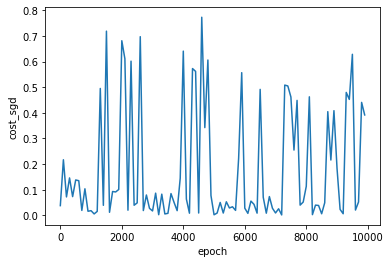

In [33]:
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.xlabel("epoch")
plt.ylabel("cost_sgd")

In [34]:
predict(3.19,w_sgd,b_sgd)   # predicting the value

19.333955166435988

## mini-batch Gradient Descent

In [35]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list_mini = []
    epoch_list_mini = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_temp = X[random_indices]
        y_temp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_temp[j:j+batch_size]
            yj = y_temp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list_mini.append(cost)
            epoch_list_mini.append(i)
        
    return w, b, cost, cost_list_mini, epoch_list_mini

w_mini, b_mini, cost, cost_list_mini, epoch_list_mini = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w_mini, b_mini, cost

(array([-0.08941713]), 0.43508670555087914, 0.006059334140923359)

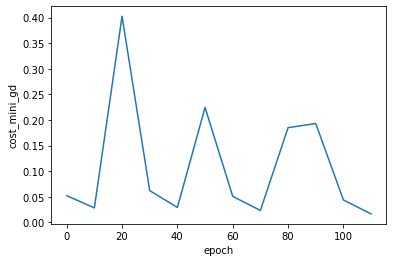

In [39]:
plt.xlabel("epoch")
plt.ylabel("cost_mini_gd")
plt.plot(epoch_list_mini,cost_list_mini)